In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# !pip install yfinance
import yfinance as yf
msft = yf.Ticker('MSFT')
msft_hist = msft.history(period='max')

In [3]:
msft_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055783,0.063987,0.055783,0.061252,1031788800,0.0,0.0
1986-03-14,0.061252,0.064533,0.061252,0.063439,308160000,0.0,0.0
1986-03-17,0.063439,0.065080,0.063439,0.064533,133171200,0.0,0.0
1986-03-18,0.064533,0.065080,0.062345,0.062892,67766400,0.0,0.0
1986-03-19,0.062892,0.063439,0.061252,0.061799,47894400,0.0,0.0


<AxesSubplot:xlabel='Date'>

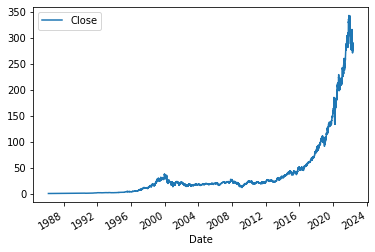

In [4]:
msft_hist.plot(y='Close', use_index=True)

In [5]:
data = msft_hist[['Close']]
data = data.rename(columns={'Close': 'Actual Close'})
data['Target'] = msft_hist['Close'].rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])

In [6]:
data.head()

,Actual Close,Target
Date,,
1986-03-13,0.061252,NaN
1986-03-14,0.063439,1.0
1986-03-17,0.064533,1.0
1986-03-18,0.062892,0.0
1986-03-19,0.061799,0.0


In [7]:
msft_prev = msft_hist.copy()
msft_prev = msft_prev.shift(1)
msft_prev.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14,0.055783,0.063987,0.055783,0.061252,1.031789e+09,0.0,0.0
1986-03-17,0.061252,0.064533,0.061252,0.063439,3.081600e+08,0.0,0.0
1986-03-18,0.063439,0.065080,0.063439,0.064533,1.331712e+08,0.0,0.0
1986-03-19,0.064533,0.065080,0.062345,0.062892,6.776640e+07,0.0,0.0


In [8]:
predictors = ['Close', 'High', 'Low', 'Open', 'Volume']
data = data.join(msft_prev[predictors]).iloc[1:]

In [9]:
data.head()

,Actual Close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14,0.063439,1.0,0.061252,0.063987,0.055783,0.055783,1.031789e+09
1986-03-17,0.064533,1.0,0.063439,0.064533,0.061252,0.061252,3.081600e+08
1986-03-18,0.062892,0.0,0.064533,0.065080,0.063439,0.063439,1.331712e+08
1986-03-19,0.061799,0.0,0.062892,0.065080,0.062345,0.064533,6.776640e+07
1986-03-20,0.060158,0.0,0.061799,0.063439,0.061252,0.062892,4.789440e+07


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=300, min_samples_split=200, random_state=1)

train = data.iloc[:-100]
test = data.iloc[-100:]

forest.fit(train[predictors], train['Target'])

In [ ]:
from sklearn.metrics import precision_score

pred = forest.predict(test[predictors])
pred

In [ ]:
preds = pd.Series(pred, index=test.index)
preds

In [ ]:
precision_score(test['Target'], preds)

In [ ]:
combined = pd.concat({'Target': test['Target'], 'Predictions': preds}, axis=1)

In [ ]:
combined.head(10)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1).fit(train[predictors], train['Target'])
log_pred = logreg.predict(test[predictors])
precision_score(test['Target'], log_pred)

In [ ]:
combined.plot()